Prototype for difference gradience assisted alignment.

Goal:
- If the user, or another module, can get alignment within ~10-30 pixels this will be able to solve it to pixel perfect.

In [1]:
from os.path import abspath
from sys import path
path.insert(0, abspath("../.."))  # Repository directory relative to this file.
from MISalign.model.mis_file import MisFile,load_mis

mis_fp=r"..\..\example\data\set_a\mymis.mis"

In [15]:
mp=load_mis(mis_fp)

In [16]:
# ['a_myimages01.jpg', 'a_myimages02.jpg']
mp.check_image_paths()

{'a_myimages01.jpg': True,
 'a_myimages02.jpg': True,
 'a_myimages03.jpg': True,
 'a_myimages04.jpg': True,
 'a_myimages05.jpg': True,
 'a_myimages06.jpg': True,
 'a_myimages07.jpg': True,
 'a_myimages08.jpg': True,
 'a_myimages09.jpg': True,
 'a_myimages10.jpg': True}

In [23]:
from MISalign.canvas.canvas_solve import rectangular_solve
import MISalign.canvas.canvas_render as cr
from matplotlib import pyplot as plt
import numpy as np

In [17]:
relations=mp.get_rels('r')
image_names=mp.get_image_names()
origin="a_myimages01.jpg"
origin_relative_offsets=rectangular_solve(
    relations=relations,
    image_names=image_names,
    origin=origin
)
display(origin_relative_offsets)

{'a_myimages01.jpg': (0, 0),
 'a_myimages02.jpg': (12, -1088),
 'a_myimages03.jpg': (20, -2229),
 'a_myimages04.jpg': (-109, -3287),
 'a_myimages05.jpg': (-98, -4230),
 'a_myimages06.jpg': (-93, -5090),
 'a_myimages07.jpg': (-83, -6080),
 'a_myimages08.jpg': (-74, -7089),
 'a_myimages09.jpg': (-65, -8028),
 'a_myimages10.jpg': (-62, -8750)}

In [20]:
image_sizes=cr.find_image_sizes(mp.get_image_paths())
image_sizes

{'a_myimages01.jpg': (1600, 1200),
 'a_myimages02.jpg': (1600, 1200),
 'a_myimages03.jpg': (1600, 1200),
 'a_myimages04.jpg': (1600, 1200),
 'a_myimages05.jpg': (1600, 1200),
 'a_myimages06.jpg': (1600, 1200),
 'a_myimages07.jpg': (1600, 1200),
 'a_myimages08.jpg': (1600, 1200),
 'a_myimages09.jpg': (1600, 1200),
 'a_myimages10.jpg': (1600, 1200)}

ORO frame X and Y overlaps [109, 1580] [-3287, -3429]
A frame X and Y overlaps [[129, 1600], [1058, 1200]]
B frame X and Y overlaps [[0, 1471], [0, 142]]


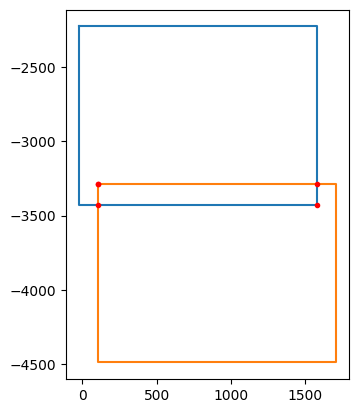

In [84]:
images_to_diff=['a_myimages03.jpg', 'a_myimages04.jpg']
img_a_oro=np.array(origin_relative_offsets[images_to_diff[0]])#Image A origin relative offset
img_a_size=image_sizes[images_to_diff[0]]#Image A Size
img_a_corners=[
    img_a_oro*[-1,1],
    img_a_oro*[-1,1]+[0,-img_a_size[1]],
    img_a_oro*[-1,1]+[img_a_size[0],-img_a_size[1]],
    img_a_oro*[-1,1]+[img_a_size[0],0],
    ]
img_b_oro=np.array(origin_relative_offsets[images_to_diff[1]])#Image B origin relative offset
img_b_size=image_sizes[images_to_diff[1]]#Image B Size
img_b_corners=[
    img_b_oro*[-1,1],
    img_b_oro*[-1,1]+[0,-img_b_size[1]],
    img_b_oro*[-1,1]+[img_b_size[0],-img_b_size[1]],
    img_b_oro*[-1,1]+[img_b_size[0],0],
    ]

img_a_set=np.array(img_a_corners+[img_a_corners[0]])
img_b_set=np.array(img_b_corners+[img_b_corners[0]])
plt.plot(img_a_set.T[0],img_a_set.T[1])
plt.plot(img_b_set.T[0],img_b_set.T[1])

#find overlap in ORO reference frame - subtract ORO of each image to get local coordinates.
image_a={
    "oro":origin_relative_offsets[images_to_diff[0]],
    "size":image_sizes[images_to_diff[0]]
}
image_b={
    "oro":origin_relative_offsets[images_to_diff[1]],
    "size":image_sizes[images_to_diff[1]]
}
x_positions=[-image_a["oro"][0],-image_a["oro"][0]+image_a["size"][0],-image_b["oro"][0],-image_b["oro"][0]+image_b["size"][0]]
x_positions.sort()
x_overlap=x_positions[1:3]
y_positions=[image_a["oro"][1],image_a["oro"][1]-image_a["size"][1],image_b["oro"][1],image_b["oro"][1]-image_b["size"][1]]
y_positions.sort(reverse=True)
y_overlap=y_positions[1:3]
print("ORO frame X and Y overlaps",x_overlap,y_overlap)
image_a_overlap=[[x+image_a["oro"][0] for x in x_overlap],[-y+image_a["oro"][1] for y in y_overlap]]
print("A frame X and Y overlaps",image_a_overlap)
image_b_overlap=[[x+image_b["oro"][0] for x in x_overlap],[-y+image_b["oro"][1] for y in y_overlap]]
print("B frame X and Y overlaps",image_b_overlap)



plt.plot([x_overlap[0],x_overlap[1],x_overlap[1],x_overlap[0],x_overlap[0]],[y_overlap[0],y_overlap[0],y_overlap[1],y_overlap[1],y_overlap[0]],"r.")
plt.gca().set_aspect('equal')

In [82]:
#extract overlapping regions from images
from PIL import Image as PILImage
import numpy as np

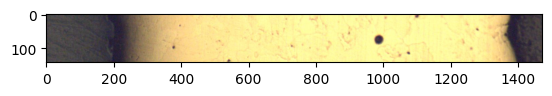

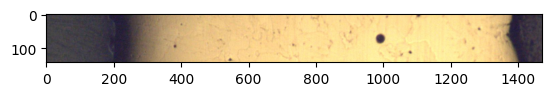

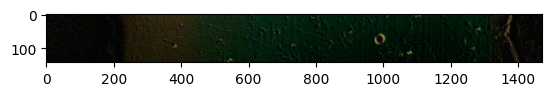

In [88]:

img_fp=mp.get_image_paths()[images_to_diff[0]]
with PILImage.open(img_fp) as open_image:
    img_arr_a=np.array(open_image)
# plt.imshow(img_arr_a)
# plt.figure()
img_a_roo=img_arr_a[image_a_overlap[1][0]:image_a_overlap[1][1],image_a_overlap[0][0]:image_a_overlap[0][1]]#region of overlap
plt.imshow(img_a_roo)
plt.figure()
img_fp=mp.get_image_paths()[images_to_diff[1]]
with PILImage.open(img_fp) as open_image:
    img_arr_b=np.array(open_image)
# plt.imshow(img_arr_b)
# plt.figure()
img_b_roo=img_arr_b[image_b_overlap[1][0]:image_b_overlap[1][1],image_b_overlap[0][0]:image_b_overlap[0][1]]
plt.imshow(img_b_roo)
plt.figure()
plt.imshow(abs(img_a_roo.astype(int)-img_b_roo.astype(int)))

# Develop functions to get numerical representation of offset match.

## Setup

In [1]:
from os.path import abspath
from sys import path
path.insert(0, abspath("../.."))  # Repository directory relative to this file.
from MISalign.model.mis_file import MisFile,load_mis

mis_fp=r"..\..\example\data\set_a\mymis.mis"
mp=load_mis(mis_fp)

In [41]:
from MISalign.canvas.canvas_solve import rectangular_solve
import MISalign.canvas.canvas_render as cr
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image as PILImage

In [3]:
relations=mp.get_rels('r')
image_names=mp.get_image_names()
origin="a_myimages01.jpg"
origin_relative_offsets=rectangular_solve(
    relations=relations,
    image_names=image_names,
    origin=origin
)
image_sizes=cr.find_image_sizes(mp.get_image_paths())

## Function-based code

In [34]:
def get_overlap(origin_relative_offsets,image_sizes,images)->np.ndarray:
    oro_select={name:origin_relative_offsets[name] for name in images}
    is_select={name:image_sizes[name] for name in images}
    origin_relative_extents=cr.find_relative_extents(
        image_names=images,
        origin_relative_offsets=oro_select,
        image_sizes=is_select)
    canvas_extents, canvas_offsets=cr.resolve_extents(origin_relative_extents)
    canvas_relative_offsets=cr.place_in_canvas(
        images,
        oro_select,
        canvas_extents,
        canvas_offsets)
    overlap_array=cr.build_normalization(
        images,
        is_select,
        canvas_relative_offsets,
        canvas_extents,
        cr.weight_flat
    )
    return overlap_array,canvas_relative_offsets

In [35]:
## check to confirm that there is in fact overlap
def check_overlap(origin_relative_offsets,image_sizes,image_name_a,image_name_b)->bool:
    return np.any(get_overlap(origin_relative_offsets,image_sizes,[image_name_a,image_name_b])[0]==2)
check_overlap(origin_relative_offsets,image_sizes,'a_myimages03.jpg','a_myimages04.jpg')
#This also works for rotated images assuming weight_flat is updated to handle rotation.

True

[1058, 2258, 129, 1729]

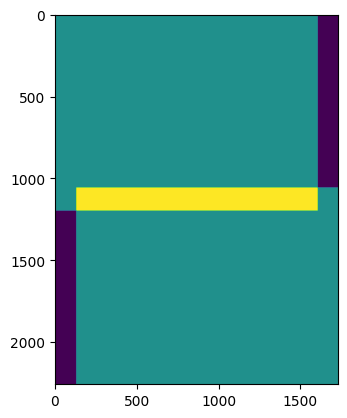

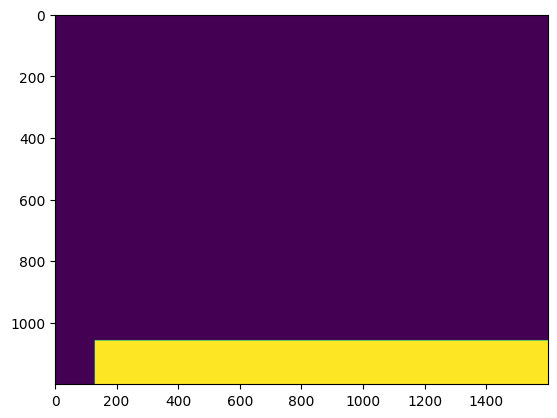

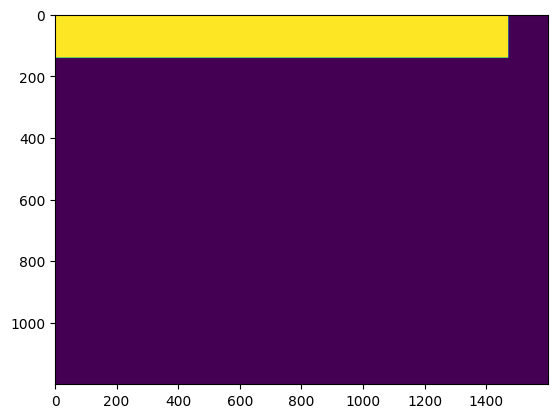

In [39]:
## Calculate ORO-coordinate overlap
overlap_array,canvas_relative_offsets=get_overlap(origin_relative_offsets,image_sizes,['a_myimages03.jpg','a_myimages04.jpg'])
plt.imshow(overlap_array)
plt.figure()
# plt.imshow(overlap_array==2)
## Calculate A- and B-coordinate overlaps
A_isolate=[canvas_relative_offsets['a_myimages03.jpg'][1],
           canvas_relative_offsets['a_myimages03.jpg'][1]+image_sizes['a_myimages03.jpg'][1],
           canvas_relative_offsets['a_myimages03.jpg'][0],
           canvas_relative_offsets['a_myimages03.jpg'][0]+image_sizes['a_myimages03.jpg'][0]
           ]
A_iso_arr=(overlap_array)[A_isolate[0]:A_isolate[1],A_isolate[2]:A_isolate[3]]
plt.imshow(A_iso_arr)

plt.figure()
B_isolate=[canvas_relative_offsets['a_myimages04.jpg'][1],
           canvas_relative_offsets['a_myimages04.jpg'][1]+image_sizes['a_myimages04.jpg'][1],
           canvas_relative_offsets['a_myimages04.jpg'][0],
           canvas_relative_offsets['a_myimages04.jpg'][0]+image_sizes['a_myimages04.jpg'][0]
           ]
B_iso_arr=(overlap_array)[B_isolate[0]:B_isolate[1],B_isolate[2]:B_isolate[3]]
plt.imshow(B_iso_arr)
B_isolate

In [49]:
A_iso_arr.repeat

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

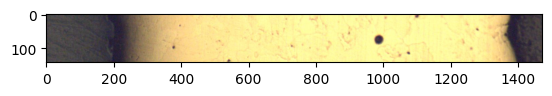

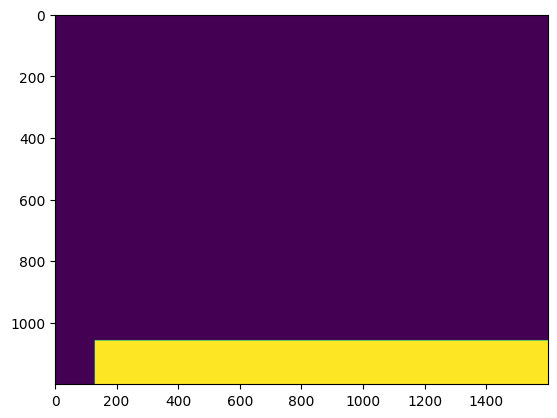

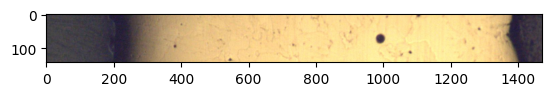

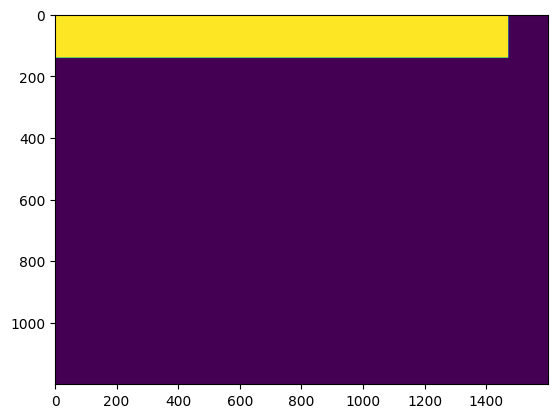

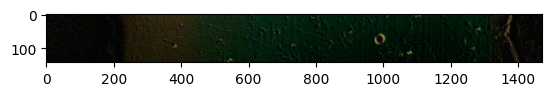

In [56]:
## Get difference given A- and B-coordinate overlaps
img_fp=mp.get_image_paths()['a_myimages03.jpg']
with PILImage.open(img_fp) as open_image:
    img_arr_a=np.array(open_image)
plt.figure()
plt.imshow(img_arr_a[(A_iso_arr==2)].reshape(142,1471,3))
plt.figure()
plt.imshow(A_iso_arr==2)

img_fp=mp.get_image_paths()['a_myimages04.jpg']
with PILImage.open(img_fp) as open_image:
    img_arr_b=np.array(open_image)
plt.figure()
plt.imshow(img_arr_b[(B_iso_arr==2)].reshape(142,1471,3))
plt.figure()
plt.imshow(B_iso_arr==2)


plt.figure()
plt.imshow(np.abs(img_arr_a[(A_iso_arr==2)].reshape(142,1471,3).astype(int)-img_arr_b[(B_iso_arr==2)].reshape(142,1471,3).astype(int)))


Issue with this approach: Each permutation requires generation of a grid - this might be better for non-rectangular images but for this specific use case it seems like a large amount of extra work. Probably want to use numerical approach.

Also, all of this has been ORO-based but it could/should be image-image offset based.

In [62]:
diff_grad_rel=mp.get_rels('r')[2]
print(diff_grad_rel)
# [('a_myimages03.jpg', 'a_myimages04.jpg'), (-129, -1058)]
# The top left corner of a3 is at the 'origin'. The top left corner of a4 is 129 to the right and 1058 down

[('a_myimages03.jpg', 'a_myimages04.jpg'), (-129, -1058)]


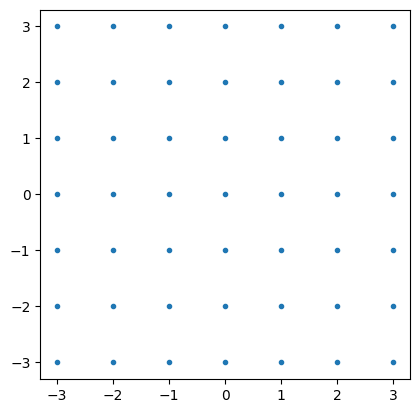

In [131]:
check_distance=3
check_shape=(1+check_distance*2,1+check_distance*2)
check_grid=np.fromfunction(lambda x,y: np.array([x-check_distance,y-check_distance]),shape=check_shape)
plt.plot(check_grid[0].flatten(),check_grid[1].flatten(),".")
plt.gca().set_aspect('equal')

offset_test_grid=np.full((2,*check_shape),np.array([[diff_grad_rel[1]]]).T)+check_grid

# test_values=np.fromfunction(lambda x,y: np.abs(x-check_distance)+np.abs(y-check_distance),shape=check_shape)
# plt.imshow(test_values)

In [64]:
def get_image_array(mp:MisFile,image_name):
    with PILImage.open(mp.get_image_paths()[image_name]) as open_image:
        img_arr=np.array(open_image)
    return img_arr
# plt.imshow(get_image_array(mp,'a_myimages03.jpg'))

In [149]:
results=np.full(check_shape,np.nan).flatten()
for i,(xo,yo) in enumerate(zip(
        offset_test_grid[0].reshape(-1,1),
        offset_test_grid[1].reshape(-1,1)
        )):
    print(i,xo,yo)
    #check if this offset is valid i.e. hasn't separated images

    #get overlap difference
    
    #generate metric value

    #store metric value in results array using index

0 [-132.] [-1061.]
1 [-132.] [-1060.]
2 [-132.] [-1059.]
3 [-132.] [-1058.]
4 [-132.] [-1057.]
5 [-132.] [-1056.]
6 [-132.] [-1055.]
7 [-131.] [-1061.]
8 [-131.] [-1060.]
9 [-131.] [-1059.]
10 [-131.] [-1058.]
11 [-131.] [-1057.]
12 [-131.] [-1056.]
13 [-131.] [-1055.]
14 [-130.] [-1061.]
15 [-130.] [-1060.]
16 [-130.] [-1059.]
17 [-130.] [-1058.]
18 [-130.] [-1057.]
19 [-130.] [-1056.]
20 [-130.] [-1055.]
21 [-129.] [-1061.]
22 [-129.] [-1060.]
23 [-129.] [-1059.]
24 [-129.] [-1058.]
25 [-129.] [-1057.]
26 [-129.] [-1056.]
27 [-129.] [-1055.]
28 [-128.] [-1061.]
29 [-128.] [-1060.]
30 [-128.] [-1059.]
31 [-128.] [-1058.]
32 [-128.] [-1057.]
33 [-128.] [-1056.]
34 [-128.] [-1055.]
35 [-127.] [-1061.]
36 [-127.] [-1060.]
37 [-127.] [-1059.]
38 [-127.] [-1058.]
39 [-127.] [-1057.]
40 [-127.] [-1056.]
41 [-127.] [-1055.]
42 [-126.] [-1061.]
43 [-126.] [-1060.]
44 [-126.] [-1059.]
45 [-126.] [-1058.]
46 [-126.] [-1057.]
47 [-126.] [-1056.]
48 [-126.] [-1055.]


# Overlap Function

In [10]:
Ax,Ay=(1600,1200)
Ashape=(Ax,Ay)
Bx,By=(1600,1200)
Bshape=(Bx,By)

offsets_to_test=[
    (1500,1100),
    (1500,-1100),
    (-1500,1100),
    (-1500,-1100),
    (1500,0),
    (0,1100),
    (-1500,0),
    (0,-1100)
]

In [9]:
def axis_span(OVn,Anmax,Bnmax):
    if OVn==0:
        Anspan=[0,min(Anmax,Bnmax)]
        bnspan=[0,min(Anmax,Bnmax)]
    elif OVn > 0:
        Anspan=[OVn,Anmax]
        bnspan=[0,Anmax-OVn]
    elif OVn < 0:
        Anspan=[0,Bnmax+OVn]
        bnspan=[-OVn,Bnmax]
    else:
        ValueError()
    return Anspan,bnspan



for offset_vector in offsets_to_test:
    print("Offset:",offset_vector)
    print("Validity check:",offset_vector[0]>-Bx,offset_vector[0]<Ax,offset_vector[1]>-By,offset_vector[1]<Ay)
    print("X spans:",axis_span(offset_vector[0],Ax,Bx))
    print("Y spans:",axis_span(offset_vector[1],Ay,By))


Offset: (1500, 1100)
Validity check: True True True True
X spans: ([1500, 1600], [0, 100])
Y spans: ([1100, 1200], [0, 100])
Offset: (1500, -1100)
Validity check: True True True True
X spans: ([1500, 1600], [0, 100])
Y spans: ([0, 100], [1100, 1200])
Offset: (-1500, 1100)
Validity check: True True True True
X spans: ([0, 100], [1500, 1600])
Y spans: ([1100, 1200], [0, 100])
Offset: (-1500, -1100)
Validity check: True True True True
X spans: ([0, 100], [1500, 1600])
Y spans: ([0, 100], [1100, 1200])
Offset: (1500, 0)
Validity check: True True True True
X spans: ([1500, 1600], [0, 100])
Y spans: ([0, 1200], [0, 1200])
Offset: (0, 1100)
Validity check: True True True True
X spans: ([0, 1600], [0, 1600])
Y spans: ([1100, 1200], [0, 100])
Offset: (-1500, 0)
Validity check: True True True True
X spans: ([0, 100], [1500, 1600])
Y spans: ([0, 1200], [0, 1200])
Offset: (0, -1100)
Validity check: True True True True
X spans: ([0, 1600], [0, 1600])
Y spans: ([0, 100], [1100, 1200])


In [14]:
def axis_span(OVn,Anmax,Bnmax):
    if OVn==0:
        Anspan=(0,min(Anmax,Bnmax))
        bnspan=(0,min(Anmax,Bnmax))
    elif OVn > 0:
        Anspan=(OVn,Anmax)
        bnspan=(0,Anmax-OVn)
    elif OVn < 0:
        Anspan=(0,Bnmax+OVn)
        bnspan=(-OVn,Bnmax)
    else:
        ValueError()
    return Anspan,bnspan

def overlap_spans(offset_vector:tuple,a_shape:tuple,b_shape:tuple):
    if not all([offset_vector[0]>-b_shape[0],offset_vector[0]<a_shape[0],offset_vector[1]>-b_shape[1],offset_vector[1]<a_shape[1]]):
        ValueError("These images do not overlap")
    xspans=axis_span(offset_vector[0],a_shape[0],b_shape[0])
    yspans=axis_span(offset_vector[1],a_shape[1],b_shape[1])
    return xspans, yspans

for offset_vector in offsets_to_test:
    print("Offset: ",offset_vector)
    print("Spans(((xa),(xb)),((ya),(yb))): ",overlap_spans(offset_vector,Ashape,Bshape))

Offset:  (1500, 1100)
Spans(((xa),(xb)),((ya),(yb))):  (((1500, 1600), (0, 100)), ((1100, 1200), (0, 100)))
Offset:  (1500, -1100)
Spans(((xa),(xb)),((ya),(yb))):  (((1500, 1600), (0, 100)), ((0, 100), (1100, 1200)))
Offset:  (-1500, 1100)
Spans(((xa),(xb)),((ya),(yb))):  (((0, 100), (1500, 1600)), ((1100, 1200), (0, 100)))
Offset:  (-1500, -1100)
Spans(((xa),(xb)),((ya),(yb))):  (((0, 100), (1500, 1600)), ((0, 100), (1100, 1200)))
Offset:  (1500, 0)
Spans(((xa),(xb)),((ya),(yb))):  (((1500, 1600), (0, 100)), ((0, 1200), (0, 1200)))
Offset:  (0, 1100)
Spans(((xa),(xb)),((ya),(yb))):  (((0, 1600), (0, 1600)), ((1100, 1200), (0, 100)))
Offset:  (-1500, 0)
Spans(((xa),(xb)),((ya),(yb))):  (((0, 100), (1500, 1600)), ((0, 1200), (0, 1200)))
Offset:  (0, -1100)
Spans(((xa),(xb)),((ya),(yb))):  (((0, 1600), (0, 1600)), ((0, 100), (1100, 1200)))


# Overlap Function Image Test

In [15]:
from os.path import abspath
from sys import path
path.insert(0, abspath("../.."))  # Repository directory relative to this file.
from MISalign.model.mis_file import MisFile,load_mis

mis_fp=r"..\..\example\data\set_a\mymis.mis"
mp=load_mis(mis_fp)

from matplotlib import pyplot as plt
import numpy as np

In [23]:
rect_rels=mp.get_rels('r')
display(rect_rels)
for rel_set in rect_rels:
    img_a_name=rel_set[0][0]
    img_b_name=rel_set[0][1]
    img_a_name=rel_set[1][0]
    img_b_name=rel_set[1][1]

[[('a_myimages01.jpg', 'a_myimages02.jpg'), (12, -1088)],
 [('a_myimages02.jpg', 'a_myimages03.jpg'), (8, -1141)],
 [('a_myimages03.jpg', 'a_myimages04.jpg'), (-129, -1058)],
 [('a_myimages04.jpg', 'a_myimages05.jpg'), (11, -943)],
 [('a_myimages05.jpg', 'a_myimages06.jpg'), (5, -860)],
 [('a_myimages06.jpg', 'a_myimages07.jpg'), (10, -990)],
 [('a_myimages07.jpg', 'a_myimages08.jpg'), (9, -1009)],
 [('a_myimages08.jpg', 'a_myimages09.jpg'), (9, -939)],
 [('a_myimages09.jpg', 'a_myimages10.jpg'), (3, -722)]]

[('a_myimages01.jpg', 'a_myimages02.jpg'), (12, -1088)]